# Pymaceuticals Inc.
---

### Analysis
1) Out of the four drug regimens used for the box and whisker plots, "Capomulin" and "Ramicane" seem to be the most effective as they are result in the smallest tumors by the final recorded time point for the mice.
    - It should be mentioned, however, that these two drug regimens were also the two most tested drug regimens in the dataset
2) For mice undergoing the Capomulin drug regime, there was a strong correlation between weight and tumor size
3) The difference in the number of male and female mice was negligable (they were within one percentage point of each other)
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_dataset = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_dataset.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [24]:
# Checking the number of mice.
number_of_mice = len(merged_dataset["Mouse ID"].unique())

# Output
print(f"There are {number_of_mice} mice")


There are 249 mice


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Finding the number of instances of all mice by Mouse ID and Timepoint (The 
# incusion of the "sex" filter is added for easier readability)
value_counts = merged_dataset.groupby(["Mouse ID", "Timepoint"])["Sex"].count()

# Any mouse with a count value greater than one has a duplicate entry (which in this
# case just includes the mouse with the ID 'g989')
had_dup_vals = value_counts[value_counts > 1]

# Output
had_dup_vals

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Sex, dtype: int64

In [26]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_dataset[merged_dataset["Mouse ID"] == "g989"]

# Output
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# All instances of duplicate mouse 'g989' are removed here (I am assuming we are
# just removing the mouse from the dataset overall and not just removing one instance
# of the mouse based off the fact that the number of unique mice in the dataframe has been 
# reduced by one in the next step)
merged_dataset_clean = merged_dataset[merged_dataset["Mouse ID"] != "g989"]

# Output
merged_dataset_clean.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [28]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
number_of_mice_clean = len(merged_dataset_clean["Mouse ID"].unique())

# Output
print(f"There are {number_of_mice_clean} mice")

There are 248 mice


## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics_table = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume Std. Err.": tumor_volume_std_err,
})

# Output
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_table = merged_dataset_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])

# Output
agg_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

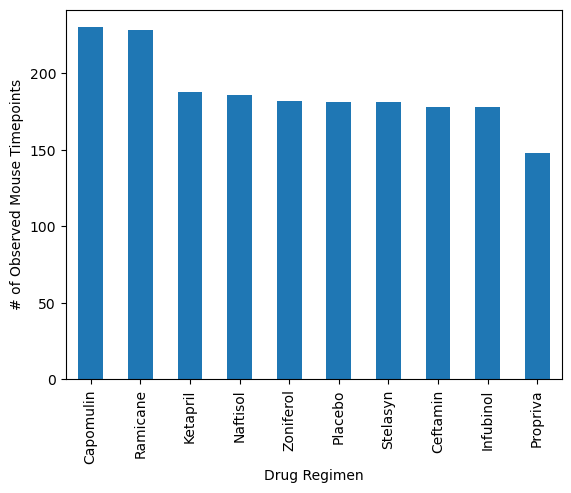

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# The reason I never explicitly mentioned "Timepoint" here is because the only time where "Mouse ID" is duplicated
# is when there is more than one Timepoint - thus adding any filter relating to "Timepoint" would be redundant here
num_mice_by_dr = merged_dataset_clean.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)

# Creating the bar plot
num_mice_by_dr.plot(kind="bar")

# Adding labels to the bar plot
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Output
plt.show()

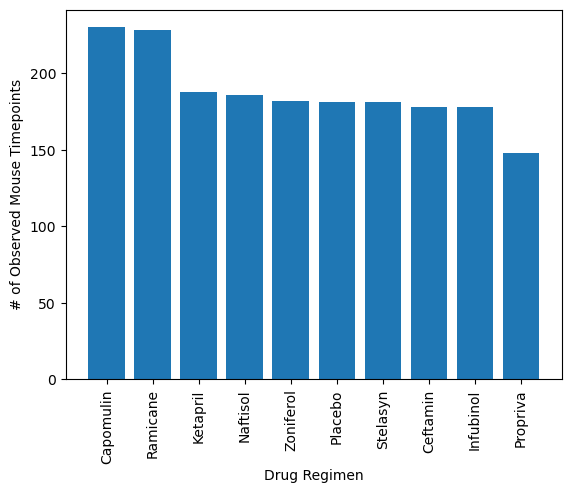

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# I just used the data created above for the Pandas plot, turned it into a dict and seperated the keys and values
# to get the appropriate x and y values for the MatPlotLib bar graph.
x_axis = num_mice_by_dr.to_dict().keys()
y_axis = num_mice_by_dr.to_dict().values()
 
# Creating the bar graph
plt.bar(
    x=x_axis,
    height=y_axis
)

# Adding labels and setting the xticks to vertical for better readability
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

# Output
plt.show()



Text(0, 0.5, 'count')

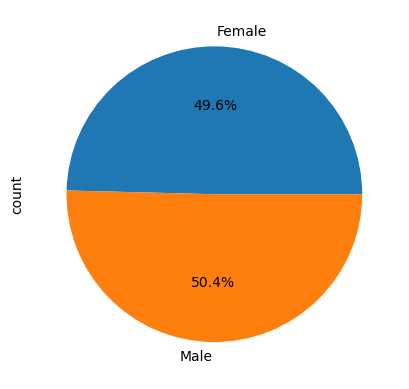

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_split = merged_dataset_clean[["Mouse ID", "Sex"]].drop_duplicates().groupby("Sex")["Mouse ID"].count()
gender_split

# Make the pie chart
gender_split.plot(
    kind="pie",
    autopct="%1.1f%%"
)

plt.ylabel("count")

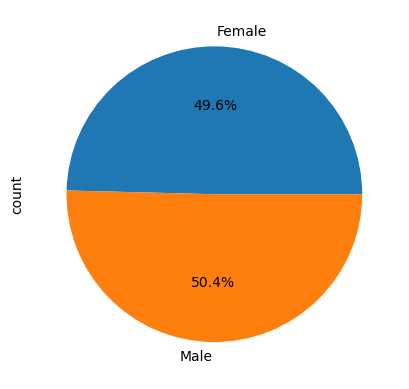

In [34]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# This step was redundant, as we are able to just pass in the data from the above
# pie graph into the below plt.pie() call.

# Make the pie chart
plt.pie(gender_split, autopct="%1.1f%%", labels=["Female", "Male"])
plt.ylabel("count")

plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint_data = merged_dataset_clean.groupby("Mouse ID")["Timepoint"].max()
final_timepoint_data

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_data_merged = pd.merge(final_timepoint_data, merged_dataset_clean, how="inner", on=["Mouse ID", "Timepoint"]).reset_index(inplace=False, drop=True)
final_timepoint_data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments_list:
    # Getting all values in the merged dataset for the given "Drug Regimen"
    treatment_values = final_timepoint_data_merged[final_timepoint_data_merged["Drug Regimen"] == treatment]
    # Calculating the quartiles for tumor volumes for the given "Drug Regimen"
    treatment_quartiles = treatment_values["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    # IQR and upper and lower bounds are generated here to find potential outliers in the data
    iqr = treatment_quartiles[0.75] - treatment_quartiles[0.25]
    upper_bound = treatment_quartiles[0.75] + (iqr * 1.5)
    lower_bound = treatment_quartiles[0.25] - (iqr * 1.5)

    # Determine outliers using upper and lower bounds
    potential_outliers = treatment_values[(treatment_values["Tumor Volume (mm3)"] < lower_bound) | (treatment_values["Tumor Volume (mm3)"] > upper_bound)]
    # Output
    print(f"Treatment - {treatment}:\nIQR = {iqr}\nOutliers = {potential_outliers}\n")
    tumor_data.append(potential_outliers)



Treatment - Capomulin:
IQR = 7.781863460000004
Outliers = Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Treatment - Ramicane:
IQR = 9.098536719999998
Outliers = Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Treatment - Infubinol:
IQR = 11.477135160000003
Outliers =    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  

Treatment - Ceftamin:
IQR = 15.577752179999997
Outliers = Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []



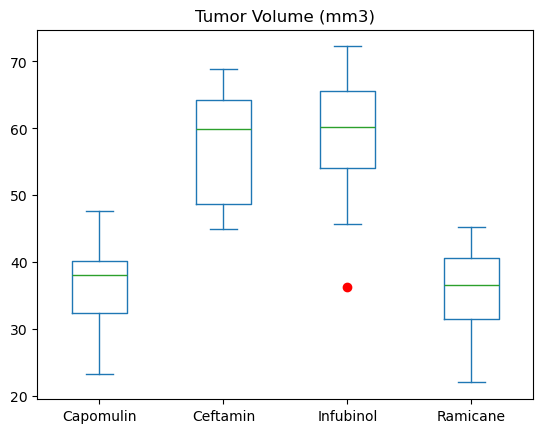

In [37]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# This statement is finding only the values with "Drug Regimen" values that match one of the four 
# "Drug Regimens" that we are looking at (and then just selecting the appropriate values from those 
# rows ("Drug Regimen" and "Tumor Volume (mm3)"))
plot_values = final_timepoint_data_merged[
    (final_timepoint_data_merged["Drug Regimen"] == "Capomulin") |
    (final_timepoint_data_merged["Drug Regimen"] == "Ramicane") |
    (final_timepoint_data_merged["Drug Regimen"] == "Infubinol") |
    (final_timepoint_data_merged["Drug Regimen"] == "Ceftamin")
][["Drug Regimen", "Tumor Volume (mm3)"]]

# Generating the boxplot
# BorrowedCodeFlag1
plot_values.plot(
    kind="box",
    by="Drug Regimen",
    sym="r"
)

# Output
plt.show()

## Line and Scatter Plots

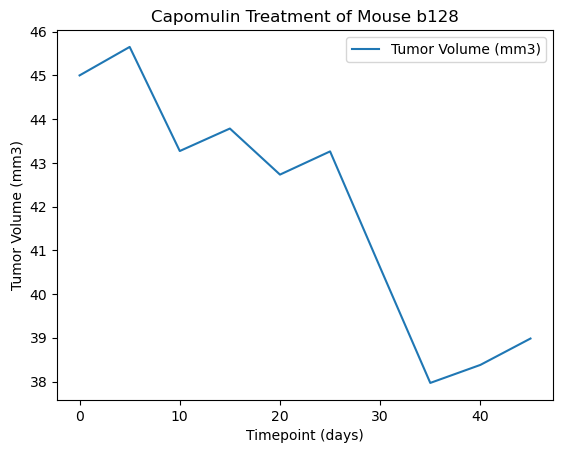

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# This statement finds all rows for mouse b128 (a mouse going under the "Capomulin" treatment)
# Only tumor volume and timepoint are selected here as these are the only data points that will be graphed
line_plot_data = merged_dataset_clean[(merged_dataset_clean["Drug Regimen"] == "Capomulin") & (merged_dataset_clean["Mouse ID"] == "b128")][["Tumor Volume (mm3)", "Timepoint"]]

# Line plot generated
line_plot_data.plot(
    x="Timepoint",
    y="Tumor Volume (mm3)"
)

# Setting the labels and titles for the graph to match the example given in the challenge
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

# Output 
plt.show()

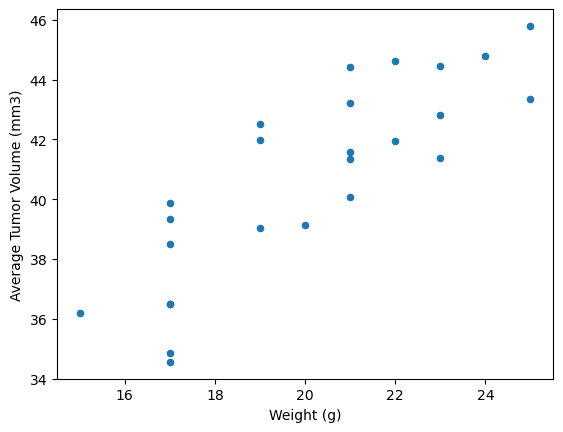

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Mouse weight and average observed tumor volume over all timepoints for each mouse are generated here for future plotting
scatter_data = merged_dataset_clean[merged_dataset_clean["Drug Regimen"] == "Capomulin"][["Tumor Volume (mm3)", "Weight (g)", "Mouse ID"]].groupby("Mouse ID").mean()

# Scatter plot generated
scatter_data.plot(
    kind="scatter",
    x="Weight (g)",
    y="Tumor Volume (mm3)"
)

# Labels are added for improved readability
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

# Output
plt.show()


## Correlation and Regression

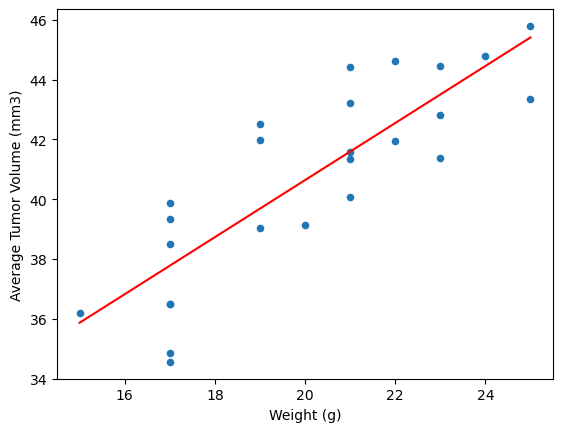

The correlation coefficient is 0.8419363424694721


In [42]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# A linear regression is used here to calculate a trend line
(slope, interecept, rvalue, pvalue, stderr) = st.linregress(x = scatter_data["Weight (g)"], y = scatter_data["Tumor Volume (mm3)"])

# Scatter plot generated
scatter_data.plot(
    kind="scatter",
    x="Weight (g)",
    y="Tumor Volume (mm3)"
)

# Values for line graph generated (calculated from values from the 'st.linregress()')
weight_vals = range(15, 26)
correlation_values = [weight * slope + interecept for weight in weight_vals]

# Linear graph plotted from values calculated above
plt.plot(
    weight_vals,
    correlation_values,
    c="red"
)

# Labels are added for improved readability
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

# Output
plt.show()
print(f"The correlation coefficient is {rvalue}")